### Papers

- [DeepCoder](https://arxiv.org/pdf/1611.01989.pdf)
- [List of papers by Gabriel preda](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/130794)
- [WReN](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/130364)

### Notebooks 

- [Starter Notebook](https://www.kaggle.com/inversion/abstraction-and-reasoning-starter-notebook)
- [Visualize pairs with gridlines](https://www.kaggle.com/boliu0/visualizing-all-task-pairs-with-gridlines)
- [Manual Coding for the First 10](https://www.kaggle.com/nagiss/manual-coding-for-the-first-10-tasks)
- [View all data](https://www.kaggle.com/nagiss/abstraction-and-reasoning-view-all-data)
- [Check the purpose](https://www.kaggle.com/t88take/check-the-purpose)
- [EDA + PyTorch CNN](https://www.kaggle.com/tarunpaparaju/arc-competition-eda-pytorch-cnn): I didn't like so much...
- [DSL and Genetic Algorithm applied to ARC](https://www.kaggle.com/zenol42/dsl-and-genetic-algorithm-applied-to-arc): this may be good.

### Discussions

- [DeepMind's papers in abstract and relational reasoning](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/131741)
- [Recursion](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/130778#747811), with linked [paper](https://openreview.net/pdf?id=Skp1ESxRZ).


### Ideas

My ideas

- Genetic Programming for Program Synthesis.
  - How the concepts of *gene*, *chromosome*, *genotype*, *phenotype* etc. applies to the ARC data?
- Explore task with "same" pattern using the colab dataset about them that I have downloaded. Build on that; for 30 tasks in that category, try solving 10 and try generelize to the remaining.
- Explore natural computing paradigms, specifically artificial immune systems algorithms. Maybe combine with genetic programming?
- [Estimation of distribution algorithms](https://www.wikiwand.com/en/Estimation_of_distribution_algorithm) may be interesting with program syntheis in the search phase?
  - *... are stochastic optimization methods that guide the search for the optimum by building and sampling explicit probabilistic models of promising candidate solutions.*
  - It seems that it isn't only me who thinks [that](https://slideplayer.com/slide/10859008/).

Chollet advices

- [1](https://twitter.com/fchollet/status/1228056479854317568/photo/1), [kaggle](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/130360#745388): Take a few tasks, write by hand programs that solve them, and think...
  - *Could they [the programs] be expressed more naturally in a different medium* (a Domain Specific Language; remember HTML is a DSL, as well as CSS, SQL etc.)?
    - For example, some tasks require "filling" pixels, other require "moving" objects etc.
    - It can be useful to describe the data properties such as *number of pixels*, because some tasks not only changes its pixels but increase its number.
  - *What would a search process that outputs such programs look like?*
  - *How could you simplify this search by conditioning it on the task data?*
    - Program synthesis can help here.
    - For example, in the task of **filling pixels**, a question can be like "based on this data, which program can perform this action?".j
      - Can be a search, can be synthesis, can be both?
        - The **synthesis** could be in the *domain specific language* used. See task, see data, know actions, generates DSL code, perform actions?
  - *Once you have a set of generated candidates for a solution program, how do you pick the one most likely to generalize?*
    - Continuing from the example above: "which program better generalizes?"
      - This is a difficult one, I think. I need to know more. How to measure proficiency at the desired task?
        - I will need to evaluate my reasoning in solving the task, and see what non-solved task looks like.
  - *If you want to use external data, or hard-code Core Knowledge priors -- all of this is allowed. Virtually anything is allowed. Just get those leaderboard scores to go down :)*
- [2](https://www.youtube.com/watch?v=2L2u303FAs8&list=PLht6tyws1YpSOGz2k6bUC1PibVG7ZiRFB&index=6&t=0s): blending symbolic AI & geometric AI.
  - How would that work here?
- [3](https://www.wikiwand.com/en/Program_synthesis): program synthesis.
  - Could help with 1.
- [4](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/130710#764733): *the test tasks only leverage Core Knowledge priors and nothing else.*
- [5](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/130345#745382): *The goal is develop an AI that will be capable of autonomously making sense of tasks it has never been directly programmed or trained to handle.*
- [6](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/130527#746338): *You can hard-code rules & knowledge, and you can use external data.*.
- [7](https://www.youtube.com/watch?v=U8ekfLYBGR0): his notes.

Other advices

- Jeremy P Howard gives [Genetic Programming](https://www.wikiwand.com/en/Genetic_programming), which may be used in the approach above, as suggested by FC.
  - "It is essentially a heuristic search technique often described as 'hill climbing', i.e. searching for an optimal or at least suitable program among the space of all programs."
    - This may be an answer to the "search process".
- Davide Bonin says: *The real challenge is writing each solution as a composition of (reasonably few) task-independent functions.*
- [Pathan](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/130345#748512): cites [Moravec paradox](https://www.wikiwand.com/en/Moravec%27s_paradox).
- [jack liu](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/130527#748780): deep concept.

# Starter

In [1]:
import os
import json
from pathlib import Path

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

for dirname, _, filenames in os.walk('arc'):
    print(dirname)

arc
arc/evaluation
arc/test
arc/training


In [3]:
from utils import training_path
from utils import training_tasks, evaluation_tasks, test_tasks
from utils import cmap, norm
from utils import load_and_plot, just_load_task, plot_one_ax

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
print(len(training_tasks), len(evaluation_tasks), len(test_tasks))

400 400 100


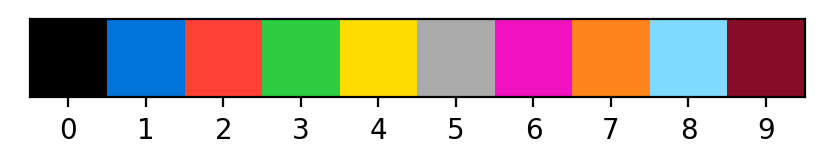

In [5]:
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

- Tasks have multiple `train` input-output pairs.
- Most tasks have a single `test` input-output pairs, although some have more than one.

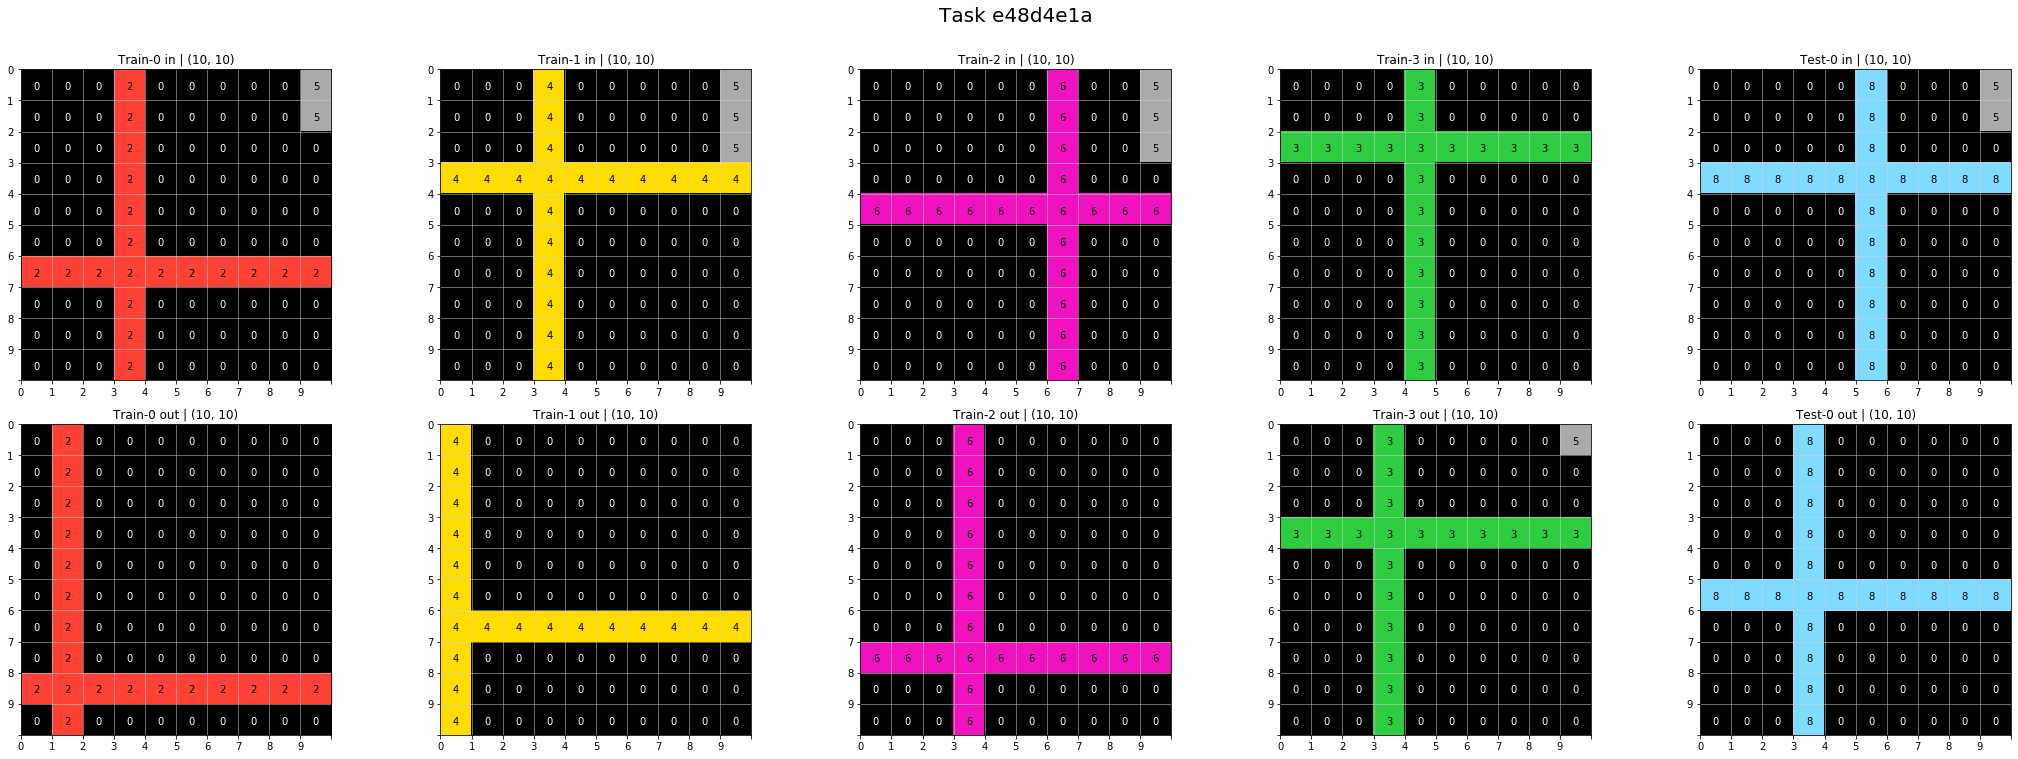

In [6]:
# tid = random.randint(0, 400)
fname = 'e7b06bea.json'
tid = evaluation_tasks.index(fname)
#tid = 107
load_and_plot(training_path, training_tasks[tid], annotate=True)

## DSL part starter

- Inspired by [Jérémy Cochoy](https://www.kaggle.com/zenol42/dsl-and-genetic-algorithm-applied-to-arc)

In [10]:
def group_by_color_unlifted(pixmap):
    nb_colors = int(pixmap.max()) + 1
    splited = [(pixmap == i) * i for i in range(1, nb_colors)]
    return [x for x in splited if np.any(x)]


def crop_to_content_unlifted(pixmap):
    true_points = np.argwhere(pixmap)
    if len(true_points) == 0:
        return []
    top_left = true_points.min(axis=0)
    bottom_right = true_points.max(axis=0)
    pixmap = pixmap[top_left[0]:bottom_right[0] + 1,
                    top_left[1]:bottom_right[1] + 1]
    return pixmap


def negative_unlifted(pixmap):
    negative = np.logical_not(pixmap).astype(int)
    color = max(pixmap.max(), 1)
    return negative * color

In [7]:
task = just_load_task(training_tasks[tid], training_path)
task = task['train']

In [8]:
pixmap = np.array(task[0]['input'])

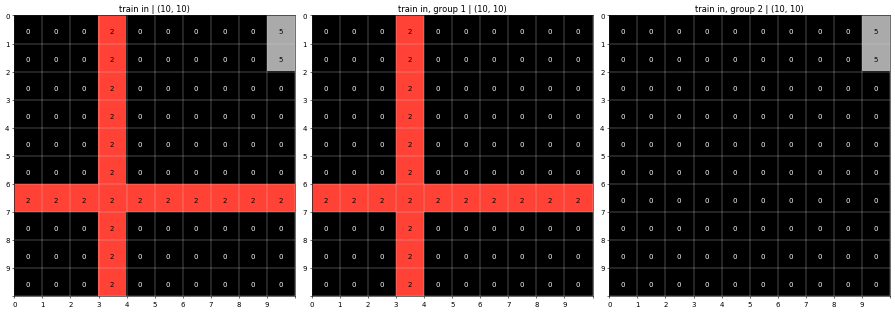

In [11]:
grouped = group_by_color_unlifted(pixmap)

n = len(grouped)

fig, axs = plt.subplots(1, n + 1, figsize=(6*(n+1), 8), dpi=50)
plt.subplots_adjust(wspace=0, hspace=0)
plot_one_ax(axs[0], pixmap, cmap=cmap, norm=norm, title='train in', annotate=True)
for i, group in enumerate(grouped):
    plot_one_ax(axs[i+1], group, cmap=cmap, norm=norm, title=f'train in, group {i + 1}', annotate=True)
plt.tight_layout()
plt.show()